#  Lecture 10 - Correlations

<br><br>

The next step is to modify the frequencies of image in accordance with the frequencies in another image<br><br>

We will start with a review of correlation theory, which may seem out of place<br><br>

However, the theory will be followed by relating this theory to Fourier filtering 

<br><br><br><br>

## Justification and Theory

Consider the simple example shown in the first picture below that depicts an attempt to find a specific signal embedded in a larger signal<br><br>

The smaller signal (red) exists somewhere in the larger signal (green)<br><br>

A correlation will consider all possible shifts of the target signal (red) with the data signal (green)<br><br>

<br><br>
<div><img src="https://github.com/joefoxva1/CDS468/blob/master/Lectures10_11_12/L12_1.png?raw=true" width="250"/img></div>
<br><br>

One of the features of the target signal is that is it zero-sum<br><br>

When it is placed as shown the values of the target signal are multiplied with the corresponding values of the data signal<br><br>

If there is no match then the collection of multiplied values will contain both positive and negative results<br><br>

Thus, the summation would be somewhat close to zero<br><br>

However, when the two signals align then the negative values will be multiplied by negative values, thus the summation will contain only positive values<br><br>

For this particular relative shift between the two signals, the correlation signal should have a peak<br><br>

There may other relative shifts in which the two signals have a significant amount of similarity, and so subsidiary peaks are also possible, particularly if the original signal has a repetitive structure<br><br>

The correlation of these two signals is also shown in the second figure<br><br>

Locations of the large peaks in the correlation signal indicate relative shifts of the signals for potential alignment.<br><br>

Consider the largest peak in the second picture<br><br>

The distance from the location of the peak to the center of the graph is the distance that needs to be shifted to align<br><br>

The two signals, now aligned by that shift distance are shown in third picture<br><br>

As seen the target is now positioned to part of the signal that is similar to the target

<br><br>
<div><img src="https://github.com/joefoxva1/CDS468/blob/master/Lectures10_11_12/L12_1.png?raw=true" width="250"/img></div>
<br><br>

<br><br>
<div><img src="https://github.com/joefoxva1/CDS468/blob/master/Lectures10_11_12/L12_2.png?raw=true" width="250"/img></div>
<br><br>

<br><br>
<div><img src="https://github.com/joefoxva1/CDS468/blob/master/Lectures10_11_12/L12_3.png?raw=true" width="250"/img></div>
<br><br>

Each value is the sum of the multiplied values of a specific shift<br><br>

A large spike in this signal indicates that there is a shifted position of the target signal that matches the content in the data signal<br><br>

The location of this spike is directly related to amount of shift of the target signal<br><br>

In this examples there is a spike near $x=175$<br><br>

This indicates the shift required of the target signal to find a matching location in the data signal

<br><br><br><br>


## Theory

<br>

The correlation of the two functions, $f(x)$ and $g(x)$, is

$c(u)=\int_{-\infty}^{\infty} f(x+u) g^{\dagger}(x) \mathrm{d} x$

where $g^\dagger(x)$ represents the complex conjugate fo $g(x)$

The function $f(x)$ is shifted and multiplied by the function $g(x)$

The integration sums the multiplied values

A correlation in two-dimensions is quite similar in nature

$c(u, v)= \int_{-\infty} ^\infty \int_{-\infty} ^\infty f(x+u,y+v) g^\dagger (x, y) ~dx ~dy$

The operator notation for a correlation is $\otimes$ and is written as,

${\bf c}[\vec u] = {\bf a}[\vec x] \otimes {\bf b}[\vec x]$

The output, ${\bf c}[\vec u]$, is denoted in a new space by $\vec u \in {\bf U}$.

The correlation of a function with itself is called an <b>auto-correlation</b>

This is a useful procedure for finding presence of regular patters in a signal

The correlation of two different functions is also called a <b>cross-correlation</b>

<br><br><br><br>

### Computations in Fourier Space

<br>

For large two-dimensional arrays the computations of a correlation using the above equation can be slow<br><br>

If, for example, an image was $N \times N$ pixels then the number of mult-adds (multiplications and additions) goes as $N^4$<br><br>

A more efficient method of computing the correlation is to employ Fourier transforms

Consider the Fourier transform of a correlation,

$C(\alpha) = \int_{-\infty} ^\infty c(u) e^{ -\imath u \alpha } ~du$

From above, this becomes

$C(\alpha) = \int_{-\infty} ^\infty  \int_{-\infty} ^\infty f(x+u) g^\dagger (x) ~ \exp \left[ -\imath u \alpha \right] ~ dx ~du$

Using the substitution $z=x+u$ the equation becomes,

$C(\alpha) = \int_{-\infty} ^\infty  \int_{-\infty} ^\infty f(z) g^\dagger (x) ~ e^{ -\imath \alpha (z-x)} ~ dx ~dz$

This can be rewritten as,

$C(\alpha) = \int_{-\infty}^\infty f(z) e^{-\imath \alpha z}~dz 
    \int_{-\infty} ^\infty  g^\dagger (x) ~ e^{ \imath \alpha x} ~ dx
    = F(\alpha) G^\dagger (\alpha)$

where $F(\alpha)$ is the Fourier transform of $f(x)$ and $G(\alpha)$ is the Fourier transform of $g(x)$<br><br>

This equation computes the Fourier transform of the correlation and so an inverse transform needs to be applied to obtain the correlation<br><br>

In operator notation this is,

${\bf c}[\vec \alpha] = \mathfrak{F}^{-1} \left( (\mathfrak{F} {\bf a}[\vec x]) \times ( \mathfrak{F} {\bf b}[\vec x] )^\dagger \right) = {\bf a}[\vec x] \otimes {\bf b}[\vec x]$


The digital correlation for a signal of length $N$ requires $N^2$ mathematical operations<br><br>


The digital Fourier transform for a signal of length $N$ requires $N \log_2 (N)$ operations.<br><br>

The correlation using the Fourier methods requires three Fourier transforms and the elemental multiplication of two signals<br><br>

Thus, the number of operations is $3 N \log_2 (N) + N$<br><br>

Consider a case in which an image is $1024 \times 1024$<br><br>

Then $N$ would be about $10^6$ and the original correlation method would require $10^{12}$ operations<br><br>

The Fourier method, though, would only require $6.4 \times 10^7$ operations<br><br>

For large arrays the computational savings is several orders of magnitude, and very easy to employ

<br><br><br><br>

### Implementation in Python

<br>

There are two possible methods to compute a correlation in Python<br><br>

The first uses a brute force method, or the digital equivalent of the equations above<br><br>

This works well if one of the input functions is small in size<br><br>

The second method uses the Fourier transforms which is better suited for the cases in which both inputs are images

<br><br><br><br>

### Brute Force

<br>

The scipy.signal package contains a few functions that can perform the brute force correlations<br><br>

For a one-dimensional signal the function is correlate and for a two-dimensional signal the correct function is correlate2d<br><br>

This function will receive two arrays and the second array should be small in size<br><br>

The first picture will show the original image and the second image will show the result after the correlation<br><br>

In this case each pixel in the output space is the average overall pixels in a $5 \times 5$ region<br><br>

So, this process smooths the image

<br><br>


Original Image Shape: (145, 191)


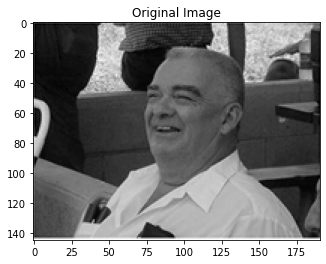

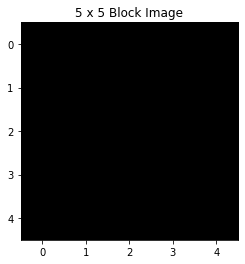


Correlated Image Shape: (149, 195)


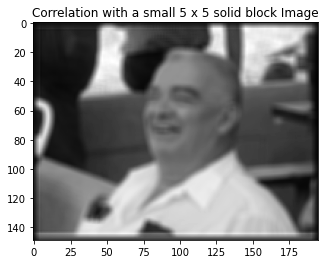

In [1]:
#  brute force
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import imageio
import scipy.signal as ss

url = 'https://raw.githubusercontent.com/joefoxva1/CDS468/master/Lectures10_11_12/L12_4.png'
adata = imageio.imread(url, as_gray=True).astype(np.uint8)
print('\nOriginal Image Shape:', adata.shape)

plt.title('Original Image')
plt.imshow(adata, cmap='gray')
plt.show()

bdata = np.ones((5,5))/25.0
plt.title('5 x 5 Block Image')
plt.imshow(bdata, cmap='gray')
plt.show()

cdata = ss.correlate2d(adata, bdata)
print('\nCorrelated Image Shape:', cdata.shape)

plt.title('Correlation with a small 5 x 5 solid block Image')
plt.imshow(cdata, cmap='gray')
plt.show()


<br><br><br><br>

It should be noted that the size of cdata is slightly bigger than adata or $N {\bf c}[\vec u] > N {\bf a}[\vec x]$<br><br>

The reason is that all possible shifts of the kernel do allow it to extend beyond the frame of the original image<br><br>

This, though, can be controlled with the optional argument mode which has three possible states<br><br>

The default state is <b>full</b> - the output is the full discrete linear cross-correlation of the inputs
 
<b>valid</b> - the output consists only of those elements that do not rely on the zero-padding. In ‘valid’ mode, either in1 or in2 must be at least as large as the other in every dimension<br><br>

<b>same</b> - the output is the same size as in1, centered with respect to the ‘full’ output<br><br>

<br><br>

### Kernels

<br>

The small matrix is called a kernel and there are several kernels with known and useful behaviors<br><br>

Consider the kernel

$\left(\begin{array}{ccccc}-1 & -1 & -1 & -1 & -1 \\ -1 & 0 & 0 & 0 & -1 \\ -1 & 0 & 16 & 0 & -1 \\ -1 & 0 & 0 & 0 & -1 \\ -1 & -1 & -1 & -1 & -1\end{array}\right)$

which is a zero-sum matrix and is also called an on-center off-surround matrix<br><br>

In this case the result is an edge enhanced image<br><br>

The value of a single pixel in the output space is corresponding pixel in the input space multiplied by 16 subtracted by the values of next neighbors<br><br>

Applying this kernel to our image we get the following:



Original Image Shape: (145, 191)


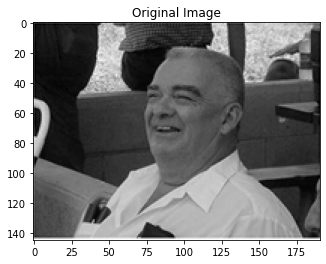

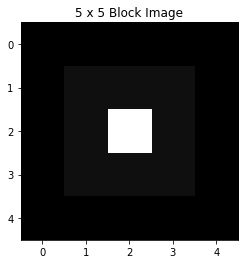


Correlated Image Shape: (149, 195)


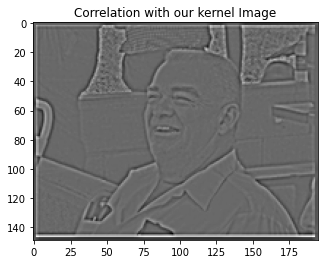

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import imageio
import scipy.signal as ss

url = 'https://raw.githubusercontent.com/joefoxva1/CDS468/master/Lectures10_11_12/L12_4.png'
adata = imageio.imread(url, as_gray=True).astype(np.uint8)
print('\nOriginal Image Shape:', adata.shape)

plt.title('Original Image')
plt.imshow(adata, cmap='gray')
plt.show()

bdata = np.array([
    [-1, -1, -1, -1, -1],
    [-1, 0, 0, 0, -1],
    [-1, 0, 16, 0, -1],
    [-1, 0, 0, 0, -1],
    [-1, -1, -1, -1, -1]
])
plt.title('5 x 5 Block Image')
plt.imshow(bdata, cmap='gray')
plt.show()

cdata = ss.correlate2d(adata, bdata)
print('\nCorrelated Image Shape:', cdata.shape)

plt.title('Correlation with our kernel Image')
plt.imshow(cdata, cmap='gray')
plt.show()


<br><br><br><br>

### Method Based on Fourier Transforms

The <b>Correlate1D</b> function, which performs a one dimensional correlation using Fourier transforms<br><br>

This receives two vectors of the same length and computes the correlation<br><br>

The equivalent function for two dimensions is <b> Correlate2D</b><br><br>

The only difference in the two functions besides the name is that the latter uses ft.fft2d and ft.ifft2d<br><br>

The function <b>Correlate2DF</b> is used in cases where the input and filter are already in Fourier space<br><br>

In some cases an image is to be correlated with several filters and so it is prudent to compute the Fourier transform of the input just once and feed it to this function for each filter<br><br>

Both the data and the filter are already in Fourier space, and <b> Correlate2DF</b> can be used to finish the correlation computation between the inputs and filter

<br><br>

In [3]:
import scipy.fft as ft
def Correlate1D(A, B):
    a = ft.fft(A)
    b = ft.fft(B)
    c = a * b.conjugate( )
    C = ft.ifft(c)
    C = ft.fftshift(C)
    return C

def Correlate2D(A, B):
    a = ft.fft2d(A)
    b = ft.fft2d(B)
    c = a * b.conjugate( )
    C = ft.ifft2(c)
    C = ft.fftshift(C)
    return C


<br><br>

### Example - Geometric Shapes

The first example is the correlation of a simple shapes.

<br><br>

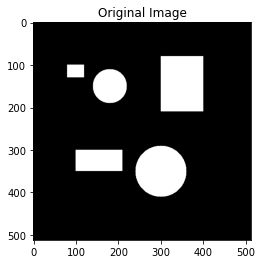

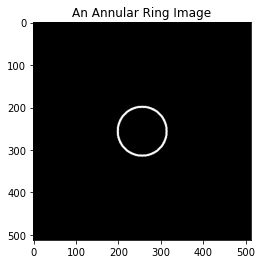

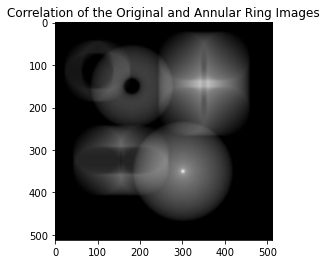

In [4]:
import numpy as np
import scipy.fftpack as ft

def Correlate2D(A, B):
    a = ft.fft2(A)
    b = ft.fft2(B)
    c = a * b.conjugate( )
    C = ft.ifft2(c)
    C = ft.fftshift(C)
    return C

def Circle(size, loc,rad):
    """frame, center, radius size is (v,h) of size of array loc is (v,h) of circle location
    rad is integer of radius returns array with a solid circle"""
    b1,b2 = np.indices(size)
    b1,b2 = b1-loc[0], b2-loc[1]
    mask = b1*b1 + b2*b2
    mask = (mask <= rad*rad).astype(int)
    return mask

adata = np.zeros((512,512))
adata[100:130,80:120] = 1
adata[300:350,100:210] = 1
adata[80:210,300:400] = 1
adata += Circle((512,512), (150,180), 40)
adata += Circle((512,512), (350,300), 60)

plt.title('Original Image')
plt.imshow(adata.real, cmap='gray')
plt.show()

bdata = Circle((512,512), (256,256), 60)
bdata -= Circle((512,512), (256,256), 55)

plt.title('An Annular Ring Image')
plt.imshow(bdata.real, cmap='gray')
plt.show()

cdata = Correlate2D(adata, bdata)

plt.title('Correlation of the Original and Annular Ring Images')
plt.imshow(cdata.real, cmap='gray')
plt.show()

<br><br><br><br>

### Example - Boat Isolation

<br>

In this example individual boats will be isolated and labeled<br><br>

The main problem in this task is that the boats and the dock touch and that the range of pixel intensities of the boats are beyond the range of the dock<br><br>

So, it is not possible to separate the dock from the boats using a threshold<br><br>

The construction of the dock is known and in this task the image is considered on only one scale and orientation<br><br>

A correlation is used to locate the dock, and then it can be subtracted from the original image<br><br>

Isolation of the boats is easy once the dock is removed<br><br>

There are four steps in this process<br><br>

The first is to load the original image and create the dock mask<br><br>

The second step is to locate the mask in the original image<br><br>

The third step is to subtract the dock<br><br>

The final step is to clean the remaining components of the image to create isolated boats

<br><br>
<div><img src="https://github.com/joefoxva1/CDS468/blob/master/Lectures10_11_12/boats1.png?raw=true" width="500"/img></div>
<br><br>

The original image is a color image extracted from a satellite image which is designated as ${\bf a}[\vec x]$<br><br>

This image is converted to gray scale as,

${\bf b}[\vec x] = \mathcal{L}_L {\bf a}[\vec x]$

The dock dimensions are known (perhaps from previous satellite images or other intelligence)<br><br>

The mask of the dock is created from simple rectangles<br><br>

The function BuildDock creates this mask<br><br>

The list <b>crn</b> contains the horizontal left edge of each rectangle<br><br>

The loop creates rectangles that are 84 pixels high and 4 wide<br><br>

This dock needs to be centered in the frame before being used in a correlation and so nd.center_of_mass finds the center of mass and nd.shift centers the dock in the frame

<br><br>

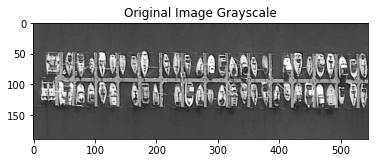

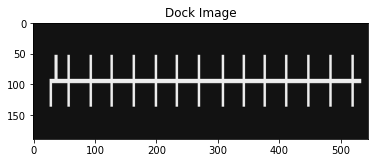

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import imageio
import scipy.ndimage as nd
import cv2

# note that we are building this manually to keep the focus on correlation
# we could build the dock in a more aautomated fashion

def BuildDock():  
    dock = np.zeros((189,545))
    dock[39:46,0:508] = 1
    dock[0:39,9:14] = 1
    dock[46:84,0:5] = 1
    crn = [30,66,100,136,172,206,242,281,315, 349,384,420,456,492]
    for c in crn:
        dock[0:84,c:c+4] = 1
    V,H = dock.shape
    v,h = nd.center_of_mass(dock)
    dock = nd.shift(dock + 0., (V/2-v, H/2-h))
    return dock

url = 'https://raw.githubusercontent.com/joefoxva1/CDS468/master/Lectures10_11_12/boats1.png'
orig = imageio.imread(url, as_gray=True).astype(np.uint8)
orig = cv2.resize(orig, dsize=(545,189))  #  resize the image

plt.title('Original Image Grayscale')
plt.imshow(orig, cmap='gray')
plt.show()

dock = BuildDock()

plt.title('Dock Image')
plt.imshow(dock, cmap='gray')
plt.show()


<br><br><br><br>

The gray scale boat image is represented by ${\bf b}[\vec x]$ and the dock mask is represented by ${\bf m}[\vec x]$<br><br>

The intent is to locate the position of the dock in the original image and then to subtract the dock which will separate the boats from other pixels in the same intensity range<br><br>

The process of locating a boat is performed by correlating the dock mask with the image<br><br>

The peak of the correlation is directly related to the location of the center of the dock in the original image<br><br>

As long as the dock is centered in the mask then the amount of shift required to align the mask to the dock in the image is the distance between the center of the frame and the location of the correlation peak<br><br>

The location of the peak is extracted by the $A_\vee$ operator which is applied to the correlation of the image with the dock mask as in,

$\vec v = A_\vee \left( {\bf b}[\vec x] \otimes {\bf m}[\vec x] \right)$

<br><br>

In [6]:
import scipy.fftpack as ft

def Correlate2D(A, B):
    a = ft.fft2(A) 
    b = ft.fft2(B)
    c = a * b.conjugate( )
    C = ft.ifft2(c)
    C = ft.fftshift(C)
    return C

def LocateDock(orig, dock):
    corr = Correlate2D(orig, dock)
    V,H = corr.shape
    v,h = divmod(abs(corr).argmax(), H)
    return v,h
    
vh = LocateDock(orig, dock)
print('\nLocation of the center of the dock', vh)



Location of the center of the dock (93, 281)


<br><br><br><br>

The code below will show the dock positioned over the image<br><br>

The method by which this image is created begins with the definition of the vector $\vec c$ as the center of the image frame<br><br>

The process is defined as

${\bf d}[\vec x] = {\bf b}[\vec x] + 300 \Gamma_{>0.1} D_{\vec v - \vec c} {\bf m}[\vec x]$

The mask is shifted by $\vec v - \vec c$ which positions the dock<br><br>

A small threshold is applied as the shift function does install small artifacts if the input images has integer values<br><br>

The result is multiplied by a large number and then added to the original<br><br>

This image is merely to determine if the dock is correctly placed and will not be used in further computations

<br><br>

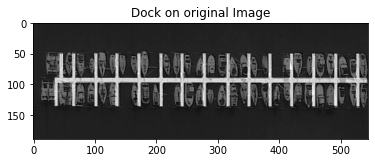

In [7]:
def Overlay(orig, dock, vh):
    v,h = vh
    V,H = dock.shape
    ndock = nd.shift(dock, (v-V/2, h-H/2))
    ndock = ndock > 0.1
    return orig + 300 * ndock

olay = Overlay(orig, dock, vh)

plt.title('Dock on original Image')
plt.imshow(olay, cmap='gray')
plt.show()


<br><br><br><br>


The third step in the process is to subtract the dock from the original image, and the fourth step is to isolate the boats. Both steps can be performed by,

${\bf f}[\vec x] = \Gamma_{>140} \left( {\bf b}[\vec x] - 200 ~ D_{\vec v - \vec c} \lhd  \Gamma_{>0.1} {\bf m}[\vec x] \right)$

Once again a small threshold is applied to the dock before the dilation process is applied as in $\lhd \Gamma_{>0.1} {\bf m}[\vec x]$<br><br>

This is to ensure that all of the background pixels are exactly 0<br><br>

If there is even a small bit error then the dilation will not work properly<br><br>

This result is shifted by $D_{\vec v - \vec c}$ so that dock is centered in the frame and then multiplied by a large value<br><br>

This is subtracted from the original thus making the dock pixels much darker than anything else in the image<br><br>

The threshold $\Gamma_{>140}$ passes only those pixels that are brighter than 140 which excludes all of the ocean pixels and dock pixels<br><br>

The surviving pixels belong only to the boats<br><br>

The process is contained within the SubtractDock function

<br><br>

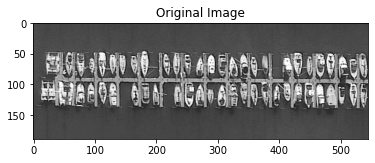

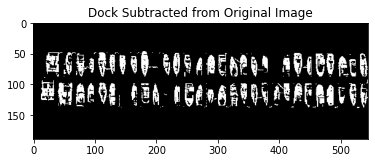

In [8]:
def SubtractDock(orig, dock, vh):
    v,h = vh
    V,H = dock.shape
    dock2 = nd.binary_dilation(dock > 0.1, iterations=1) 
    ndock = nd.shift(dock2+0., (v-V/2, h-H/2))
    ndock = (orig - 200 * ndock)>140
    return ndock
    
isoboats = SubtractDock(orig, dock, vh)

plt.title('Original Image')
plt.imshow(orig, cmap='gray')
plt.show()

plt.title('Dock Subtracted from Original Image')
plt.imshow(isoboats, cmap='gray')
plt.show()


<br><br><br><br>

Not too bad<br><br>

Not all of the boats in the image are contiguous segments<br><br>

Some of the boats have separate segments due to vastly different pixel values for the boat deck and cabin canopy<br><br>

The final step is to remove spurious pixels and to unite boats that might be shown in more than one contiguous segment<br><br>

This step relies on the idea that all of the boats are facing vertically in the image, certainly this is not true in general<br><br>

The dilation process is modified so that there is a dilation in one direction that is different than the dilation in the other direction<br><br>

In this case, the desire is to dilate in the vertical direction which would connect separated boat segments<br><br>

This dilation must be large enough to cross the gaps between segments but small enough to not bridge over the dock

The process starts with the definition of ${\bf P}$ which is a matrix that is $7 \times 1$ and all of the values are 1<br><br>

The description is,

${\bf g}[\vec x] = \mathcal{I} \lhd_{\bf P} {\bf f}[\vec x]$

The dilation $\lhd_{\bf P}$ will connect segments that are within 7 pixels of each other in the vertical direction, thus uniting the boat segments<br><br>

The final step is to label the components<br><br>

These final steps are performed in the IDboats function<br><br>

The result below displays each isolated segment with a different pixel intensity<br><br>

Isolation of a single object is performed by ${\bf g}[\vec x] \stackrel{?}{=} i$, where $i$ is an integer that is the pixel intensity of the desired object

<br><br>

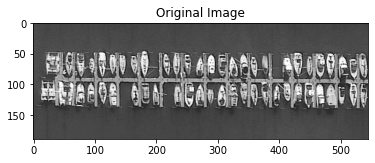

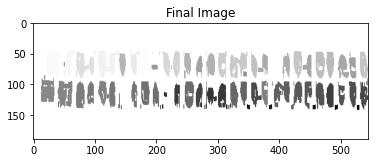

In [13]:
def IDboats(sdock):
    mask = np.ones((7,1))
    answ = nd.binary_dilation(sdock, structure = mask)
    lbl, cnt = nd.label(answ)
    return lbl, cnt
    
answ, asd = IDboats(isoboats)  

plt.title('Original Image')
plt.imshow(orig, cmap='gray')
plt.show()

plt.title('Final Image')
plt.imshow(-answ, cmap='gray')
plt.show()


<br><br><br><br>

## Composite Filtering

Correlation filters are somewhat useful but in many real applications the target can have several presentations<br><br>

In the previous example, the search was limited such that the dock could have only a single orientation and magnification
<br><br>

A more realistic case would consider any orientation and a range of scales<br><br>

It would be possible to create a filter for every possible orientation/scale combination but that would be a prohibitive computation<br><br>

A better solution is to use composite filtering which creates a filter from several training images<br><br>

Thus, one single filter could identify the location of a target over a range of orientations and scales<br><br>

Once the filter is built the computation time to identify the dock is the same as that of a single correlation

<br><br><br><br>


## SDF and MACE

SDF is the synthetic discriminant function

MACE is the minimum average correlation energy filter

The composite filter theory starts with the desire to create a filter, $\vec h$, that solves,

$\vec c = {\bf X}\vec h$

where $c_i = 1 ~~ \forall i$  and the columns of ${\bf X}$ are the target data vectors<br><br>

Extrapolation of this system to two-dimensional data is straightforward as it is possible to vertorize the image, placing all of its pixels in a single column vector<br><br>

If ${\bf X}$ were square then the solution would simply require the computation of the inverse of ${\bf X}$<br><br>

However, when used for images ${\bf X}$ is generally rectangular<br><br>

Therefore, the pseudo-inverse is employed and the filter is computed by

$\vec h = {\bf X}\left( {\bf X}^\dagger {\bf X} \right)^{-1} \vec c$

The center pixel of the correlation between the filter $\vec h$ and any of the inputs $\vec x_i$ will produce $c_i$<br><br>

This value is also $\vec h \cdot \vec x$<br><br>

Thus, $\vec c$ is called the constraint vector as it constrains a single value in the correlation, but the rest of the values are unconstrained<br><br>

It is possible that correlation values other than the center have a higher magnitude<br><br>

In these cases, the peak may not be accurately identified<br><br>

A proposed solution is to simultaneously reduce the total correlation energy as well as constrain the center value<br><br>

This led to the minimum average correlation energy (MACE) filter

The MACE is computed by,

$\hat{\vec{h}}=\mathbf{D}^{-1 / 2} \mathbf{X}\left(\hat{\mathbf{X}}^{\dagger} \mathbf{D}^{-1} \hat{\mathbf{X}}\right)^{-1} \overrightarrow{\boldsymbol{c}}$

where,

$D_{i,j} = \frac{\delta_{i,j}}{N} \sum_k | \hat x_i ^{(k)} |^2$

and $x_i ^{(k)}$ represents the i-th element of the Fourier transform of the k-th vector<br><br>

The MACE must be computed with the data in Fourier space and this is designated by the carets<br><br>

The MACE filter builds filters that produce a very sharp correlation peak when correlated with a training input<br><br>

However, if the correlation is with the filter and another vector that is not used in training the height of the correlation peak is small<br><br>

This is the case even if the correlation input vector is mostly similar to a training vector

<br><br>


## Fractional Power Filter


### Theory

The matrix <b>D</b> is a diagonal matrix and if the power term where 0 instead of 2 then <b>D</b> would be the Identity matrix<br><br>

The only difference between the two filters is the power term and thus, the FPF (fractional power filter) with

$D_{i,j} = \frac{\delta_{i,j}}{N} \sum_k | \hat x_i ^{(k)} |^\alpha$

where $0 \le \alpha \le 2$

The operator $Q_{\vec c,\alpha} \left\{ {\bf a}_i[\vec x] \right\}$ represents the process of creating an FPF filter<br><br>

The vector $\vec c$ is the constraint vector and is an optional argument<br><br>

If it is not present then it is assumed that all of the elements in this vector are set to 1 which coincides with the original use of the filter<br><br>

The $\alpha$ is the fractional power value between 0 and 2, and the images inside of the curly braces represent the training data<br><br>

Thus, the SDF can be computed by

${\bf b}[\vec x] = Q_0 \left\{ {\bf a}_i[\vec x] \right\}$

The FPF is constructed on the Fourier transform of the images and thus it is defined as

${\bf b}[\vec \omega] = Q_\alpha \left\{ \mathfrak{F} {\bf a}_i[\vec x] \right\}$

This filter is in Fourier space and thus has the coordinates defined by $\vec \omega$<br><br>

In some applications there is an efficiency to be gained by leaving the filter in the Fourier space instead of converting it back to the original image space

<br><br>

In [14]:
#  Fractional Power Filter
def FPF(data, c, fp):
    (N, Dim)= data.shape
    D = (np.power(abs(data), fp)).sum(0)
    D = D / N
    ndx = (abs(D) < 0.001).nonzero()[0]
    D[ndx] = 0.001 * np.sign(D[ndx] + 1e9)
    Y = data / np.sqrt(D)
    Y = Y.transpose()
    Yc = Y.conjugate().transpose()
    Q = Yc.dot(Y)
    if N == 1:
        Q = 1./Q
    else:
        Q = np.linalg.inv(Q)
    Rc = Q.dot(c)
    H = Y.dot(Rc) / np.sqrt(D)
    return H

data = np.random.ranf((3,10))  #  three input vectors of lenght 10
c = np.ones(3)     # constraint vector
h = FPF(data, c, 0)  #  apply the fractional filter; output corresponds to the three values in the
#                         constraint vector

print('\nInput Dot Product (center of a correlation result) Input 1:', round(h.dot(data[0]),2))

print('\nInput Dot Product (center of a correlation result) Input 2:', round(h.dot(data[1]),2))

print('\nInput Dot Product (center of a correlation result) Input 3:', round(h.dot(data[2]),2))


Input Dot Product (center of a correlation result) Input 1: 1.0

Input Dot Product (center of a correlation result) Input 2: 1.0

Input Dot Product (center of a correlation result) Input 3: 1.0


<br><br><br><br>

### Manipulating $\alpha$

The value of $\alpha$ ranges from 0 to 2 and when applied to images the behavior is somewhat predictable<br><br>

The value ${\bf D}_{i,i}$ from above is proportional to the magnitude of frequency $i$ in the training data<br><br>

However, it only uses the inverse of $\bf D$<br><br>

Thus, the filter has high magnitudes for low magnitude frequencies in the training data<br><br>

When applied to most types of images the increase in $\alpha$ corresponds to a reliance of the edge information in the training images<br><br>

This occurs since the low frequencies are often very large and correspond to solid shapes in the input<br><br>

Basically, for image of objects, an increase in $\alpha$ is related to a greater sensitivity to the object's edges<br><br>

As $\alpha$ goes from 0 to 2, the filter trades off generalization for discrimination<br><br>

A simple example of the effect of $\alpha$ begins with an image that has various, solid geometric shapes<br><br>

The creation of the filter is

${\bf h}[\vec x] = \mathfrak{F}^{-1} \mathcal{V}_{\vec w_1} Q_{\vec c,\alpha} \mathcal{C}_m \left\{ \mathcal{V}_{\vec w_2} \mathfrak{F}{\bf b}[\vec x] \right\}$

In the code below the original data is loaded as ${\bf a}[\vec x]$ and prepares a scaled version by

${\bf b}[\vec x] = 1 - \frac{1}{255} \times \mathcal{L}_L {\bf a}[\vec x]$

The process $\mathcal{V}_{\vec w_2} \mathfrak{F}{\bf b}[\vec x]$ computes the Fourier transform of the image and reshapes it to conform the $\vec w_2$<br><br>

In this case, $\vec w_2$ represents a column in the matrix with the length of $V \times H$<br><br>

The Concatenation operator $\mathcal{C}_m$ puts all of these vectors into a matrix. In the example, there is only one image and it is placed into the matrix<br><br>

In this case, $\alpha=0$<br><br>

The final two operators, $ \mathfrak{F}^{-1} \mathcal{V}_{\vec w_1}$ are performed in line 11 where $\vec w_1$ represents the original image frame size

When using a correlation, the first filter will generalize well<br><br>

The input shapes do not have to match those in the training image precisely<br><br>

However, the correlation peak may be difficult to detect particularly if there is any noise in the input<br><br>

The second filter will discriminate well<br><br>

It can better distinguish between to similar shapes because it is more sensitive to shape (the outline or edges of the objects)


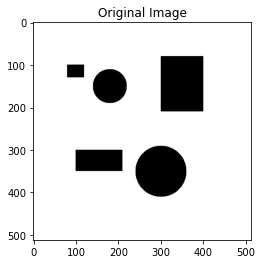

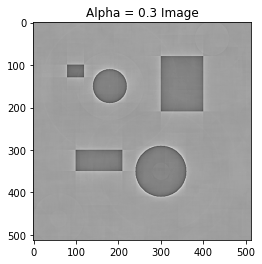

In [20]:
#  Fractional Power Filter
import numpy as np
import scipy.misc as sm
import scipy.fftpack as ft

def FPF(data, c, fp):
    # data is the incoming data... in rows : It is converted to columns here c is the constraint vector
    (N,Dim )= data.shape
    #X = transpose( data )# put vectors into columns

    # Compute D.  Best done in rows
    D = ( np.power( abs( data), fp )).sum(0)
    D = D / N
    
    # it is possible that some values of D are 0 which will bomb out later
    ndx = (abs(D) < 0.001).nonzero()[0]
    D[ndx] = 0.001 * np.sign(D[ndx]+1e9)

    # Y is the modified X.  Also more efficient to compute from original data
    Y = data / np.sqrt(D)
    Y = Y.transpose()
    
    # compute Q
    Yc = Y.conjugate().transpose()
    Q = Yc.dot(Y)  # inner product
    
    if N == 1:  # only 1 training vector
        Q = 1./Q
    else:
        Q = np.linalg.inv(Q)
    
    Rc = Q.dot(c)
    H = Y.dot(Rc) / np.sqrt(D)
    # to test:  sum(conjugate(H[:,0]) * data[:,any] should equal c[any]
    return H

url = 'https://raw.githubusercontent.com/joefoxva1/CDS468/master/Lectures10_11_12/geos.png'
bdata = imageio.imread(url, as_gray=True).astype(np.uint8)

plt.title('Original Image')
plt.imshow(bdata, cmap='gray')
plt.show()

V,H =  bdata.shape
Xt = np.zeros((1,V*H), complex)
Xt[0] = ft.fft2(bdata).ravel()
cst = np.ones(1)

alpha = .3
ffilt = FPF(Xt, cst, alpha)
filt = ft.ifft2(ffilt.reshape(V,H))

plt.title('Alpha = 0.3 Image')
plt.imshow(filt.real, cmap='gray')
plt.show()


<br><br><br><br>

### Example

This example is to identify the location of the numerals in the image of a tachometer<br><br>

The goal is to build a single FPF filter that can recognize all of the digits in a single correlation<br><br>

The original color image is defined as ${\bf a}[\vec x]$ and it needs to be processed in the same manner as above<br><br>

To train the FPF an image of each digit is isolated to create a training set<br><br>

This set consists of nine images cut out from the original, each $28 \times 28$ centered on the one of the digits<br><br>

This is a sufficient size to capture all of the pixels of a digit without also capturing pixels from other digits<br><br>

The set of vectors $\vec z_i$ is defined as the location of the center of each digit in the original image<br><br>

The process of generating these images is,

$\left\{ {\bf d}[\vec x] \right\} = U_{\vec w_1} \Box_{\vec z_i} {\bf b}[\vec x] , ~~~ \forall i$

There are nine digits in the image and so the index $i$ runs over the nine choices<br><br>

For each $i$ a small segment centered on $\vec z_i$ is copied from the image ${\bf b}[\vec x]$ and then centered in a frame that is the same size, $\vec w_1$, as the original image<br><br>

The result is a set of images $\{ {\bf d}[\vec x] \}$ that are as large as the original image and have the $28 \times 28$ image of one of the digits centered in its frame<br><br>

Once again, $\vec c$ is the constraint vector which now has a length of 9 but all of the elements still have a value of 1.0 <br><br>

Following the previous example with $\alpha=0.8$, and the filter is an edge encouraged, weight linear combination of the digits from the original image<br><br>

The final step is to correlate the gray scale image with the filter<br><br>

If the filter works then there should be bright peaks at the center location of each digit and these should be the brightest elements in the correlation<br><br>

The final step is,

${\bf f}[\vec x] = {\bf b}[\vec x] \otimes {\bf h}[\vec x]$


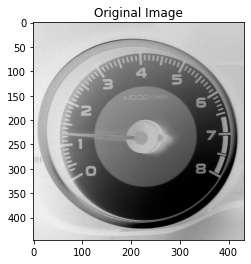

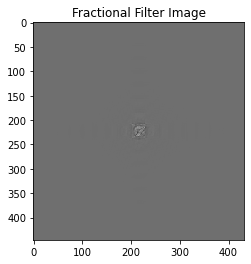

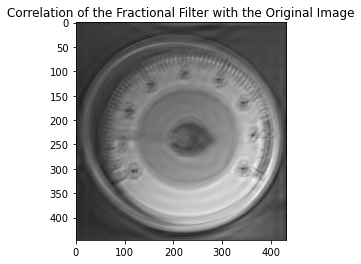

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import imageio

def LoadTach(fname):
    bdata = 1 - imageio.imread(url, as_gray=True).astype(np.uint8)/255
    cuts = []
    vhs = [(303,116), (250, 96), (182,107), (126,150), 
           (104,222), (116,294), (165,343), (231,362), 
           (300,341)]
    for v,h in vhs:
        cuts.append(bdata[v-14:v+14, h-14:h+14] + 0)
    return bdata, cuts

def MakeTachFPF(cuts, VH):
    V, H = VH
    NC = len(cuts)
    X = np.zeros((NC,V*H), complex)
    for i in range(NC):
        targ = np.zeros(VH)
        vc, hc = cuts[i].shape
        targ[V//2-vc//2:V//2+vc//2, H//2-hc//2:H//2+hc//2] = cuts[i] + 0
        targ = ft.fft2(targ)
        X[i] = targ.ravel()
    cst = np.ones(NC)
    filt = FPF(X, cst, .8)
    filt = ft.ifft2(filt.reshape(VH))
    filt *= V*H
    return filt

url = 'https://raw.githubusercontent.com/joefoxva1/CDS468/master/Lectures10_11_12/tach.png'
bdata, cuts = LoadTach(url)

plt.title('Original Image')
plt.imshow(bdata, cmap='gray')
plt.show()

filt = MakeTachFPF(cuts, bdata.shape)
fdata = Correlate2D(bdata, filt)

plt.title('Fractional Filter Image')
plt.imshow(filt.real, cmap='gray')
plt.show()

plt.title('Correlation of the Fractional Filter with the Original Image')
plt.imshow(-fdata.real, cmap='gray')
plt.show()


<br><br><br><br>

### The Constraints

In the previous section, the constraint vector had a length of $N$ and all of the elements were set to a value of 1, with $N$ being the number of training images<br><br>

This ensures that ${\bf h}[\vec x] \cdot {\bf a}_i [\vec x] = 1$ for all images ${\bf d}_i[\vec x]$ that were used in training The center of the correlation, ${\bf f}[\vec x] = {\bf d}_i [\vec x ] \otimes {\bf h}[\vec x]$ is likewise constrained to the value of 1<br><br>

The location of the constrained value is sensitive to the location of the target<br><br>

Usually, the target is centered in ${\bf d}_i[\vec x]$ and therefore it is the center value of the correlation surface that is constrained<br><br>

The correlation of a shifted version of the input is shifted by the same amount as in,

$D_{\vec v} {\bf f}[\vec x] = (D_{\vec v}{\bf d}_i[\vec x]) \otimes {\bf h}[\vec x]$

The constrained correlation value is shifted by $\vec v$ away from the center of the frame<br><br>

This effect is seen in the tachometer example<br><br>

To create the filter, each target (a cutout of the numeral) was placed in the center of an image and then these images were used to build the filter<br><br>

The correlation of the tachometer image with the filter produced correlation spikes at the center of each of the numerals<br><br>

In the training process the target was in the center of the image, but in the application the target was shifted by $\vec v$ from the center, and so the correlation peak was shifted by the same amount<br><br> 

In the correlation there are also some large signals that are off-target, particularly in the lower right region<br><br>

This is quite common when the FPF is applied to a real image<br><br>

One manner of reducing such false positives is to add new training images and rebuild the FPF<br><br>

The constraint values of these new inputs are set to values that will then use these images as null-trainers of anti-trainers<br><br>

Multiple researchers have explored the effect of values other than 1 in the constraint vector<br><br>

There are only three values that have been successfully deployed to alter the performance of the filter<br><br>

These are 0, -1, and $e^{\imath \theta}$<br><br>

Other values, such as 2, do not significantly alter the performance of the filter, particularly when applied to noisy images<br><br>

A value of 0 would force the correlation value to be 0 at the center of the target.<br><br>

In the tachometer example, there were nine training images and the constraint vector was ${\vec c} = (1,1,1,1,1,1,1,1,1,1)$<br><br>

Now, the goal is reduce one false positive<br><br>

For the sake of argument, consider the location of the false positive to be $\vec z$<br><br>

A small region about the center of $\vec z$ is cutout and centered in a larger frame, $U_{\vec w} \Box_{\vec z} {\bf b}[\vec x]$. This is added to the training set, but the correlation value is set to 0, thus making ${\vec c} = (1,1,1,1,1,1,1,1,1,1,0)$<br><br>

The FPF is constructed and the correlation signal of ${\bf b}[\vec x] \otimes {\bf h}[\vec x]$ at $\vec z$ become 0, thus eliminating the false positive at that location<br><br>

For well-behaved systems the magnitude of the correlation pixels surrounding $\vec z$ are also significantly suppressed<br><br>

However, it is possible that other false positives can be created by this new filter<br><br>

Setting a constraint value to 0 is called null-training<br><br>

Another option of suppressing the correlation value is to set the constraint element to -1<br><br>

This is called anti-training<br><br>

The value of the correlation signal at $\vec z$ is now negative which further suppresses surrounding correlation values<br><br>

The process of null-training is similar to the filtering ignoring the associated training image and the anti-training is similar to rejecting the training image<br><br>

The difference is that the latter still produces a significant magnitude in the output which is useful in more complicated FPF combinations<br><br>

The final option is to set an element in the constraint vector to $e^{\imath \theta}$ which also has a magnitude of 1<br><br>

The correlation is computed with the use of Fourier transforms and therefore the elements are inherently complex<br><br>

The use of this type of constraint will alter the phase of the correlation values<br><br>

In the tachometer example, there are correlation spikes at the target, but it is not possible to determine which target is present at each spike<br><br>

A complex constraint value would alter the phase of the correlation value without altering the magnitude<br><br>

Thus, by examining the phase, it is possible to determine which target is causing the spike<br><br>

These three alternate values for constraint elements are useful for reducing false positives or adding identifier qualities to the correlation output<br><br>

Performance of the filter is also governed by the quality of the image and the types of frequencies that are in the signal<br><br>

The construction of a filter may go through several trials before a competent filter is produced

<br><br><br><br>


### Dual FPFs

Consider a case in which there are several images, $\{ {\bf a}_i [\vec x]; i \in 1, ..., N\}$ where $i$ corresponds to a parameter such as rotation, scale, etc.<br><br>

The set of images are generated from a single image through the alteration of a parameter<br><br>

The FPF is trained on selected values of $i$<br><br>

The FPF constrains the correlation peak value for the training images but not for intermediate images<br><br>

Thus the value ${\bf a}_i[\vec x] \cdot {\bf h}[\vec x]=1$ and ${\bf a}_{i+1} [\vec x] \cdot {\bf h}[\vec x] =1$<br><br>

For example, ${\bf a}_i[\vec x]$ could a $10^\circ$ rotation of ${\bf a}[\vec x]$ and ${\bf a}_{i+1}[\vec x]$ could be a $15^\circ$ rotation of ${\bf a}[\vec x]$<br><br>

The filter would then be trained on these two images but not the images with intermediate rotations<br><br>

Then ${\bf a}_k [\vec x] \cdot {\bf h}[\vec x] <1$ where $i< k<i+1$

Below shows a graph for three different values of $\alpha$.<br><br>

The horizontal axis corresponds to the changing parameter $i$ and the vertical axis corresponds to the peak correlation value<br><br>

In this example there are four selected training images designated by vertical lines, and the peak values are the constraint values<br><br>

The intermediate values of $i$ also produce a peak correlation value but the peak value is lower for values of $i$ that are farther away from the training values<br><br>

This produces a telephone pole effect in which the peak correlation value rises nearer the training images and falls farther away from them<br><br>

There are three examples shown and there is more sag in the plots for larger values of $\alpha$<br><br>

Since larger values of $\alpha$ are more discriminatory, the correlation response degrades faster as the input image differs more from the training images

<br><br>
<div><img src="https://github.com/joefoxva1/CDS468/blob/master/Lectures10_11_12/L12_9.png?raw=true" width="250"/img></div>
<br><br>

Consider a system in which an image has a changing parameter $n$<br><br>

A few samples of the image with different values of $n$ are selected for training and all of the elements of the constraint vector are 1<br><br>

The peak correlation will then be the same for all of these training images<br><br>

This is depicted below where the horizontal line (constant correlation peak value) crosses the FPF response curve in multiple places<br><br>

Thus, if an image with an undetermined value of $n$ is correlated with the FPF it is not possible to determine the value of $n$, but it is possible to determine a set of possible values for $n$<br><br>

In this example there are six such possible values

<br><br>
<div><img src="https://github.com/joefoxva1/CDS468/blob/master/Lectures10_11_12/L12_10.png?raw=true" width="250"/img></div>
<br><br>

A properly designed dual-FPF system can determine the value of $n$ with just two filters<br><br>

These are created with different training image parameters and possibly different values of $\alpha$<br><br>

A real case using rotation as the parameter for $n$ is shown in the Figure below<br><br>

Peak correlation values are plotted for two different FPF filters<br><br>

The first filter is trained from a set of images with a large steps between values of $n$ and the second is trained on a set of data with values of $n$ that are closer together<br><br>

The selection of the training images is not strict but the goal is that the two filters should react differently for all values of $n$<br><br>

Excepting $n=0$ the filters do not share the same training images or the same difference between two consecutive values of $n$

<br><br>
<div><img src="https://github.com/joefoxva1/CDS468/blob/master/Lectures10_11_12/L12_11.png?raw=true" width="400"/img></div>
<br><br>

The two FPFs are designated by ${\bf b}[\vec x]$ and ${\bf c}[\vec x]$. An input, ${\bf a}[\vec x]$, with an unknown value of $n$ is then correlated with the two filters and the peak of each is gathered into a vector,

$\vec v = \left\{ \bigvee ( {\bf a}[\vec x] \otimes {\bf b}[\vec x] ) , 
\bigvee ( {\bf a}[\vec x] \otimes {\bf c}[\vec x] ) \right\}$

If designed correctly, there should be only one value of $n$ that produces both of those peak values<br><br>

These two values are compared to the values in the chart and the one single value of $n$ is determined as the location that best matches the values in $\vec v$<br><br>

This horizontal location is then the estimate of the parameter associated with $n$<br><br>

In this example, the horizontal value, $n$, was associated with rotation and so through these two correlations the rotation of the input can be estimated

<br><br><br><br>

## Restrictions of Correlations

The FPF is a good tool but it does have limitations which are common among correlation filters<br><br>

Correlation filters are inherently first order<br><br>

This means that the filter responds to matches with the input vector<br><br>

While it is possible to have the filter respond to a particular shape (such as the circle example) it is very difficult to build a filter that will respond to a circle that does not have a rectangle nearby<br><br>

In this latter case the problem is second order and would need a stronger tool<br><br>

Correlation filters are translation invariant<br><br>

In the case of the circle filter, it does not matter where the circle is located in the frame<br><br>

The correlation spike will be located wherever the target is located<br><br>

However, there are variances that cause performance decay in the filters<br><br>

Consider the case of searching for a rectangle of a known ratio<br><br>

A filter could be constructed to identify this rectangle, but if the query image has a rectangle of a different scale or a different rotation then the filter may not provide a good response<br><br>

The correlation filters are not rotation invariant or scale invariant<br><br>

There are a few solutions that have been proposed<br><br>

One option is to construct an FPF with several rotations and scales of the target<br><br>

The advantage of this transformation is that the scale and rotation now become linear shifts in the new space<br><br>

Since the filters are translation invariant, filters built in the polar space are rotation and scale invariant<br><br>

The disadvantage of this conversion is that the center of the object must be known, and this information may not be available in some applications

<br><br><br><br>


## Summary

An image correlation is equivalent to the alteration of the image frequencies in accordance with frequencies from a second image<br><br>

This second image in small kernel correlations has only a few elements<br><br>

Kernels for enhancing edges or smoothing the input image are easily deployed<br><br>

The computations for large kernel correlations use Fourier transforms which reduces the computation time by orders of magnitude<br><br>

A common implementation is to create a filter from an image that contains a target centered in the frame<br><br>

The correlation of this with an input that contains the target will produced a correlation surface with a large spike at the location of the target<br><br>

A composite filter is created from multiple images and has a control factor that manages the trade-off between generalization and discrimination<br><br>

This process can also be trained to ignore or reject some targets<br><br>

Dual composite filters can quantify the changing parameters in a set of images even if that parameter is not well defined

<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>


# Homework

1.  Create a vector, $\vec v$, which has 48 consecutive 0's, 32 consecutive 1's, and 48 consecutive 0's. Compute the autocorrelation of $\vec v$.  Describe the meaning of the results.<br><br>

2.  Create two images both with a frame size of $256 \times 256$. In center of the first image, ${\bf a}[\vec x]$, create a solid circle of radius 64. In the center of the second image, ${\bf b}[\vec x]$, create a solid circle of radius 70. (Use Circle to generate these images.) Compute the correlation of ${\bf a}[\vec x]$ and ${\bf b}[\vec x]$.<br><br>

3.  Create an image with a frame size of $256 \times 256$. In center of the image, ${\bf a}[\vec x]$, create a solid circle of radius 64. Using the Fractional Power Filter code, calculate and display the circle image with an alpha equal 0.2.  Repeat with an alpha equal 0.7.  Repeat using the absolute value of the resulting image.  Discuss your results.<br><br>
